# ***AIN 429 - Assignment 1***

## ***Instructor:*** Suat Özdemir
## ***Assistant:*** Ahmet Alkılınç
## ***Subject:*** Data Preprocessing
## ***Student Info:*** Can Ali Ateş
## ***Student ID:*** 2200765002

# ***LIBRARIES***

In [ ]:
# Import Necessary Libraries.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

# ***DATASET***

## ***About***

#### The dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level,within an Italian city. Data were recorded from March 2004 to February 2005 (one year) representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses.

## ***Technical Details***

#### Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NO$_x$) and Nitrogen Dioxide (NO$_2$) and were provided by a co-located reference certified analyzer. Evidences of cross-sensitivities as well as both concept and sensor drifts are present as described in De Vito et al., Sens. And Act. B, Vol. 129,2,2008 (citation required) eventually affecting sensors concentration estimation capabilities. Missing values are tagged with -200 value.

## ***Attributes***

#### 0 - Date (DD/MM/YYYY)
#### 1 - Time (HH.MM.SS)
#### 2 - True hourly averaged concentration CO in mg/m$^3$ (reference analyzer)
#### 3 - PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)
#### 4 - True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m$^3$ (reference analyzer)
#### 5 - True hourly averaged Benzene concentration in microg/m$^3$ (reference analyzer)
#### 6 - PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)
#### 7 - True hourly averaged NO$_x$ concentration in ppb (reference analyzer)
#### 8 - PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NO$_x$ targeted)
#### 9 - True hourly averaged NO$_2$ concentration in microg/m$^3$ (reference analyzer)
#### 10 - PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO$_2$ targeted)
#### 11 - PT08.S5 (indium oxide) hourly averaged sensor response (nominally O$_3$ targeted)
#### 12 - Temperature in °C
#### 13 - Relative Humidity (%)
#### 14 - AH Absolute Humidity

# ***UPLOAD DATASET***

In [ ]:
# Upload the dataset from Google Drive to Google Colab.
!gdown --id 19vyggvcOs-QfYz-yACD_k5WzxdgBr30_

# Extract rar files.
!unrar x "Dataset.rar"

In [ ]:
# Read CSV File as Pandas Dataframe.
dataframe = pd.read_csv("Dataset/data.csv", sep = ";")

# Check Dimensions of dataframe.
print(f"DataFrame Dimensions: {dataframe.shape}\n")

# Display the dataframe.
display(dataframe)

DataFrame Dimensions: (9471, 17)



,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# ***DATA CLEANING***

In [ ]:
# Check number of rows with all NaN values.
print(f"NaN Row Count: {dataframe.isna().all(axis=1).sum()}")

# Check number of columns with all NaN values.
print(f"NaN Column Count: {dataframe.isna().all(axis=0).sum()}")

NaN Row Count: 114
NaN Column Count: 2


**There is 114 row with all columns are NaN and 2 column with all rows are NaN. We can't deal with these, so we have to drop them.**

In [ ]:
# Delete rows which all columns have NaN value.
dataframe = dataframe.dropna(axis=0, how='all')

# Delete columns which all columns have NaN value.
dataframe = dataframe.dropna(axis=1, how='all')

# Check dimensions of dataframe.
print(f"DataFrame Dimensions: {dataframe.shape}\n")

# Display the dataframe.
display(dataframe)

DataFrame Dimensions: (9357, 15)



,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,04/04/2005,10.00.00,"3,1",1314.0,-200.0,"13,5",1101.0,472.0,539.0,190.0,1374.0,1729.0,"21,9","29,3","0,7568"
9353,04/04/2005,11.00.00,"2,4",1163.0,-200.0,"11,4",1027.0,353.0,604.0,179.0,1264.0,1269.0,"24,3","23,7","0,7119"
9354,04/04/2005,12.00.00,"2,4",1142.0,-200.0,"12,4",1063.0,293.0,603.0,175.0,1241.0,1092.0,"26,9","18,3","0,6406"
9355,04/04/2005,13.00.00,"2,1",1003.0,-200.0,"9,5",961.0,235.0,702.0,156.0,1041.0,770.0,"28,3","13,5","0,5139"


**DataFrame dimensions reduced to (9357, 15) from (9471, 17) after dropping the rows with all columns NaN and columns with all rows NaN.**

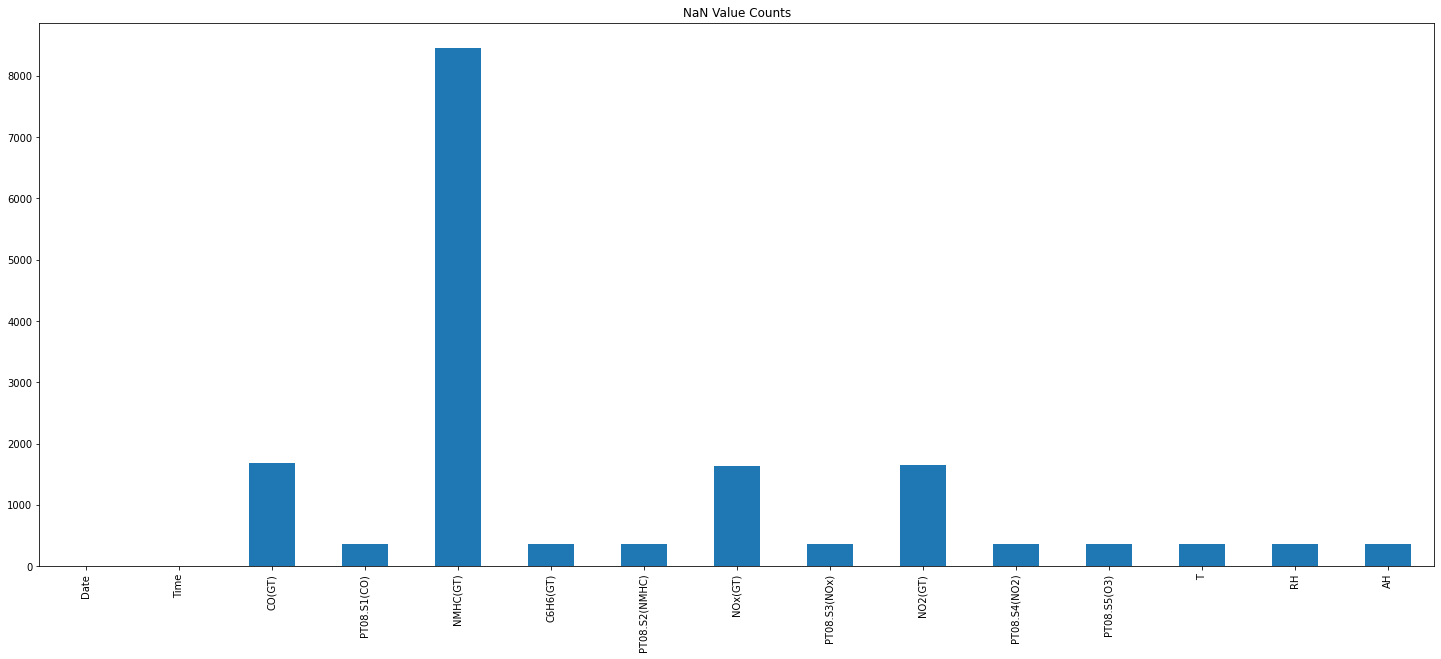

In [ ]:
# Convert -200 values which mentioned as missing value to NaN.
dataframe = dataframe.replace([-200, -200.0, '-200', '-200,0'], np.nan)

# Visualize NaN value counts of columns in dataframe.
dataframe.isna().sum().plot(kind='bar', title = "NaN Value Counts", figsize = (25,10))
plt.show()

**The NaN counts for each column was visualized after converting -200 value to NaN which was noted as the missing value in Dataset Section.**

In [ ]:
# Drop the NMHC(GT) feature.
dataframe = dataframe.drop('NMHC(GT)', axis = 1)

# Check dimensions of dataframe.
print(f"DataFrame Dimensions: {dataframe.shape}\n")

# Display the dataframe.
display(dataframe)

DataFrame Dimensions: (9357, 14)



,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,"2,6",1360.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,10/03/2004,19.00.00,2,1292.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,10/03/2004,20.00.00,"2,2",1402.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,10/03/2004,21.00.00,"2,2",1376.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,10/03/2004,22.00.00,"1,6",1272.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,04/04/2005,10.00.00,"3,1",1314.0,"13,5",1101.0,472.0,539.0,190.0,1374.0,1729.0,"21,9","29,3","0,7568"
9353,04/04/2005,11.00.00,"2,4",1163.0,"11,4",1027.0,353.0,604.0,179.0,1264.0,1269.0,"24,3","23,7","0,7119"
9354,04/04/2005,12.00.00,"2,4",1142.0,"12,4",1063.0,293.0,603.0,175.0,1241.0,1092.0,"26,9","18,3","0,6406"
9355,04/04/2005,13.00.00,"2,1",1003.0,"9,5",961.0,235.0,702.0,156.0,1041.0,770.0,"28,3","13,5","0,5139"


**NMHC(GT) feature has too much missing value, so filling it with mean, median or any learning algorithm of this feature wouldn't make sense.**

In [ ]:
# Get dataframe information.
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9357 entries, 0 to 9356
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         7674 non-null   object 
 3   PT08.S1(CO)    8991 non-null   float64
 4   C6H6(GT)       8991 non-null   object 
 5   PT08.S2(NMHC)  8991 non-null   float64
 6   NOx(GT)        7718 non-null   float64
 7   PT08.S3(NOx)   8991 non-null   float64
 8   NO2(GT)        7715 non-null   float64
 9   PT08.S4(NO2)   8991 non-null   float64
 10  PT08.S5(O3)    8991 non-null   float64
 11  T              8991 non-null   object 
 12  RH             8991 non-null   object 
 13  AH             8991 non-null   object 
dtypes: float64(7), object(7)
memory usage: 1.1+ MB


In [ ]:
# CO(GT), C6H6(GT), T, RH and AH features converted from object to float.
for column in ['CO(GT)', 'C6H6(GT)', 'T', 'RH', 'AH']:
  dataframe[column] = [str(x).replace(',', '.') for x in dataframe[column]]
  dataframe[column] = dataframe[column].astype(float)

# Get dataframe information.
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9357 entries, 0 to 9356
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         7674 non-null   float64
 3   PT08.S1(CO)    8991 non-null   float64
 4   C6H6(GT)       8991 non-null   float64
 5   PT08.S2(NMHC)  8991 non-null   float64
 6   NOx(GT)        7718 non-null   float64
 7   PT08.S3(NOx)   8991 non-null   float64
 8   NO2(GT)        7715 non-null   float64
 9   PT08.S4(NO2)   8991 non-null   float64
 10  PT08.S5(O3)    8991 non-null   float64
 11  T              8991 non-null   float64
 12  RH             8991 non-null   float64
 13  AH             8991 non-null   float64
dtypes: float64(12), object(2)
memory usage: 1.1+ MB


**CO(GT), C6H6(GT), T, RH and AH features were converted to float because they mentioned as numeric in Dataset Section.**

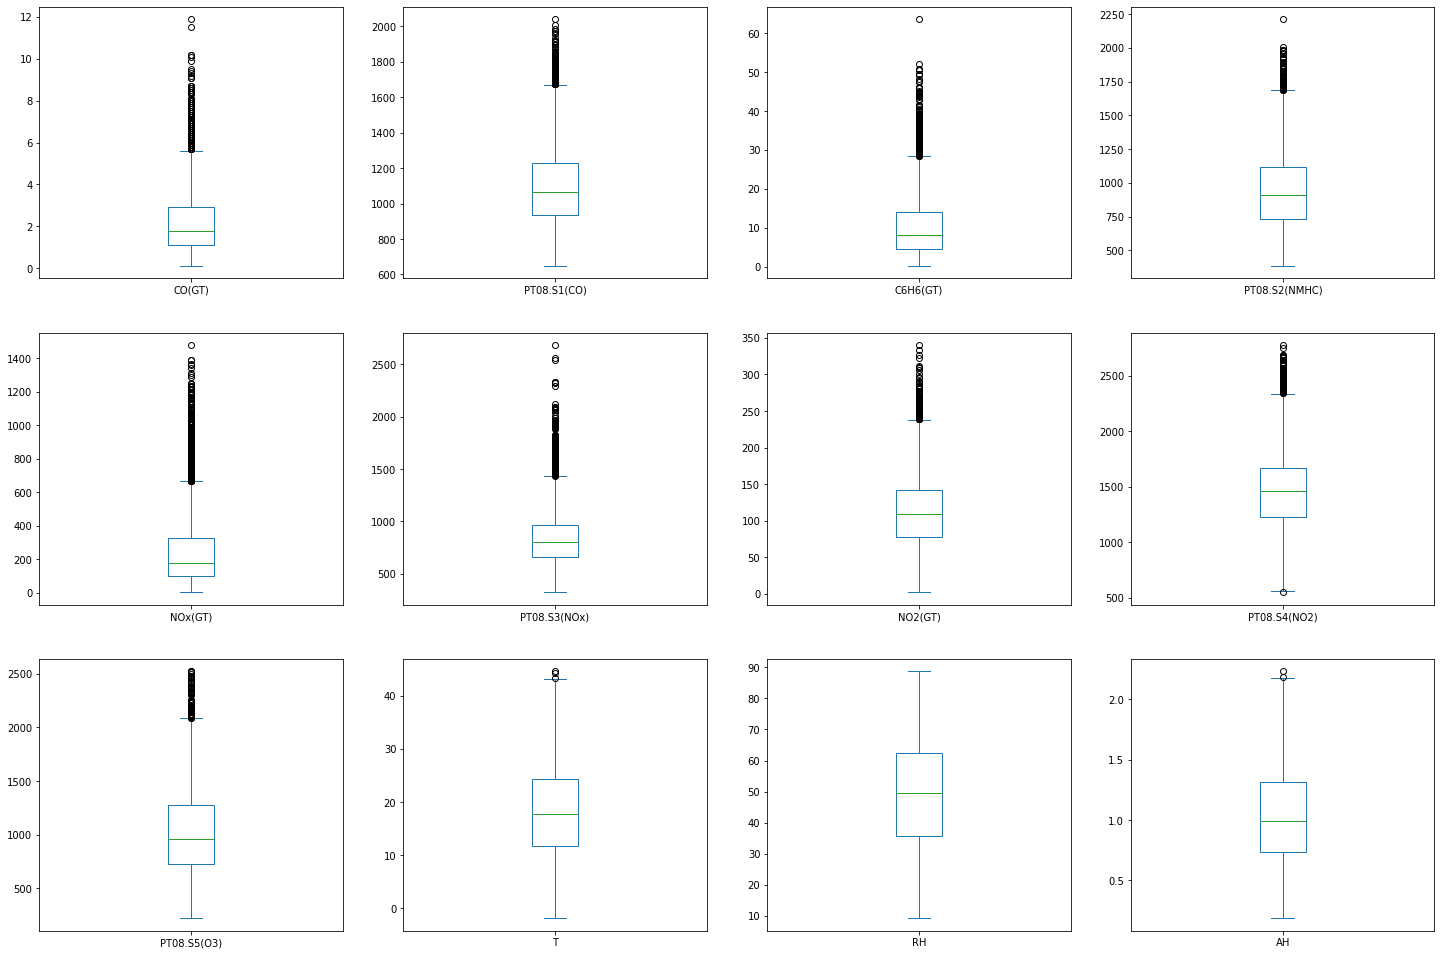

In [ ]:
# Visualize boxplots of each column.
dataframe.plot.box(subplots = True, layout = (3,4), figsize=(25, 17))
plt.show()

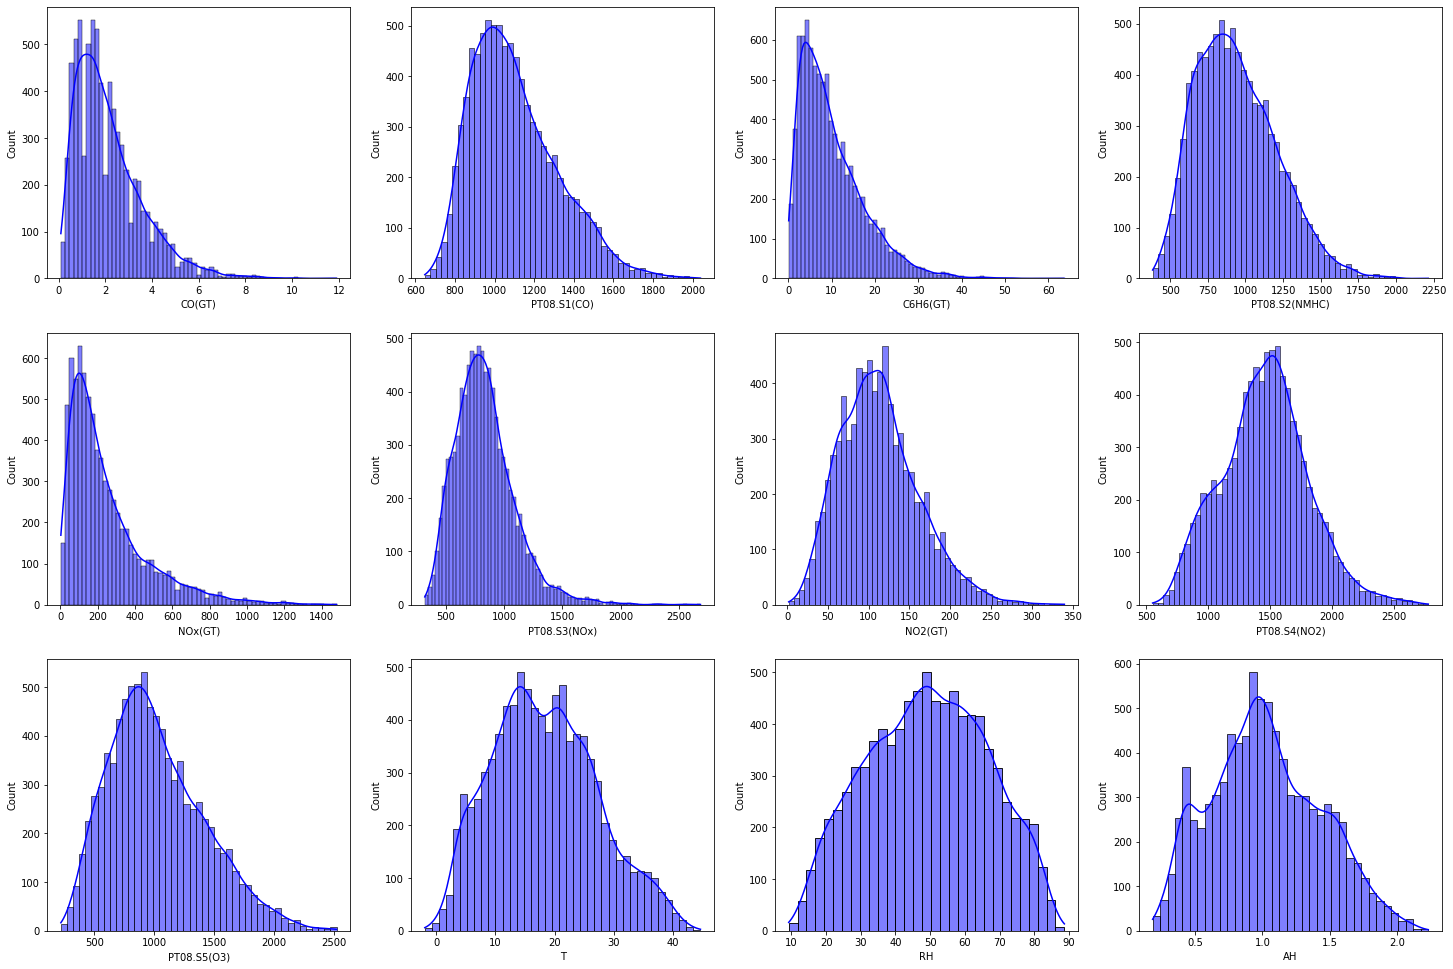

In [ ]:
# Plot histplots of each column.
figure, axes = plt.subplots(3, 4, figsize = (25, 17))

for i, column in enumerate(dataframe.iloc[:, 2:].columns):
  sns.histplot(dataframe[column], color = "blue", kde = True, ax = axes[i//4, i % 4])

plt.show()

**CO(GT), C6H6(GT), PT08.S2(NMHC), NOx(GT), PT08.S3(NOx) and NO2(GT) has certain outliers. Other features have wide scaled normal distribution so we don't need to considered them as outlier but we will smooth them with Z-Score after filling NaN values.**

In [ ]:
# Calculate the outlier count for specified features.
print(f"Outlier Count of CO(GT): {dataframe[dataframe['CO(GT)'] > 10].shape[0]}")
print(f"Outlier Count of C6H6(GT): {dataframe[dataframe['C6H6(GT)'] > 60].shape[0]}")
print(f"Outlier Count of PT08.S2(NMHC): {dataframe[dataframe['PT08.S2(NMHC)'] > 2150].shape[0]}")
print(f"Outlier Count of NOx(GT): {dataframe[dataframe['NOx(GT)'] > 1450].shape[0]}")
print(f"Outlier Count of PT08.S3(NOx): {dataframe[dataframe['PT08.S3(NOx)'] > 2600].shape[0]}")
print(f"Outlier Count of NO2(GT): {dataframe[dataframe['NO2(GT)'] > 320].shape[0]}")

Outlier Count of CO(GT): 5
Outlier Count of C6H6(GT): 1
Outlier Count of PT08.S2(NMHC): 1
Outlier Count of NOx(GT): 1
Outlier Count of PT08.S3(NOx): 1
Outlier Count of NO2(GT): 4


In [ ]:
# Drop outliers.
dataframe = dataframe.drop(dataframe[dataframe['CO(GT)'] > 10].index)
dataframe = dataframe.drop(dataframe[dataframe['C6H6(GT)'] > 60].index)
dataframe = dataframe.drop(dataframe[dataframe['PT08.S2(NMHC)'] > 2150].index)
dataframe = dataframe.drop(dataframe[dataframe['NOx(GT)'] > 1450].index)
dataframe = dataframe.drop(dataframe[dataframe['PT08.S3(NOx)'] > 2600].index)
dataframe = dataframe.drop(dataframe[dataframe['NO2(GT)'] > 320].index)

# Check dimensions of dataframe.
print(f"DataFrame Dimensions: {dataframe.shape}\n")

# Display the dataframe.
display(dataframe)

DataFrame Dimensions: (9345, 14)



,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,04/04/2005,10.00.00,3.1,1314.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,04/04/2005,11.00.00,2.4,1163.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,04/04/2005,12.00.00,2.4,1142.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,04/04/2005,13.00.00,2.1,1003.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139


**There are too few outlier in the dataframe but they can affect process of NaN value filling so we would drop these outliers.**

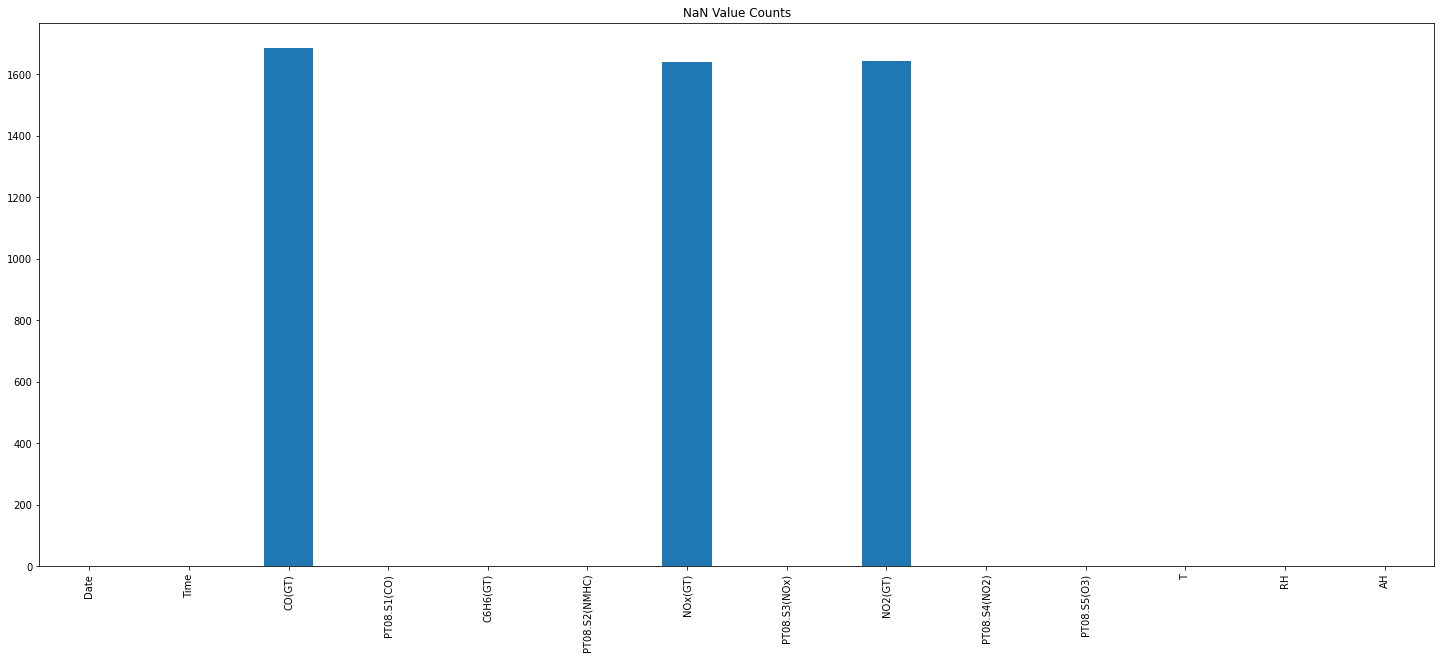

In [ ]:
# Match the feature and mean pairs to fill features which have few outlier.
values = {"PT08.S1(CO)": dataframe['PT08.S1(CO)'].mean(),
          "C6H6(GT)": dataframe['C6H6(GT)'].mean(),
          "PT08.S2(NMHC)": dataframe['PT08.S2(NMHC)'].mean(), 
          "PT08.S3(NOx)": dataframe['PT08.S3(NOx)'].mean(),
          "PT08.S4(NO2)": dataframe['PT08.S4(NO2)'].mean(),
          "PT08.S5(O3)": dataframe['PT08.S5(O3)'].mean(),
          "T": dataframe['T'].mean(),
          "RH": dataframe['RH'].mean(),
          "AH": dataframe['AH'].mean()}

# Fill the features which have too few NaN value.
dataframe = dataframe.fillna(value = values)

# Visualize NaN value counts of columns in dataframe.
dataframe.isna().sum().plot(kind='bar', title = "NaN Value Counts", figsize = (25,10))
plt.show()

**We filled the features with very few NaN values with the mean, but we need to use a learning algorithm to populate remained features because there are much value missing than filled features.**

In [ ]:
# Create a function for missing value prediction with Linear Regression.
def fill_features(dataframe, feature_name, x1, x2):
  
  # Create a Linear Regression Model.
  linear_reg = LinearRegression()
  
  # Slice dataframe as feature and related feature.
  dataset = dataframe.iloc[:, x1:x2]

  # Take NaN valued rows of feature.
  null_dataframe = dataset[dataset[feature_name].isna()]

  # Take not NaN valued rows of feature.
  without_null_dataframe = dataset.dropna()

  # Split not NaN valued dataframe.
  train_x = without_null_dataframe.iloc[:, 1:]
  train_y = without_null_dataframe.iloc[:, 0]

  # Train the model.
  linear_reg.fit(train_x, train_y)

  # Predict missing values.
  predicted = linear_reg.predict(null_dataframe.iloc[:, 1:])

  # Arrange index and prediction value pairs to fill NaN values.
  values = dict()
  for target, i in enumerate(dataframe[dataframe[feature_name].isna()].index):
    values[i] = predicted[target]

  # Fill the NaN values of feature.
  dataframe[feature_name].fillna(value = values, inplace = True)

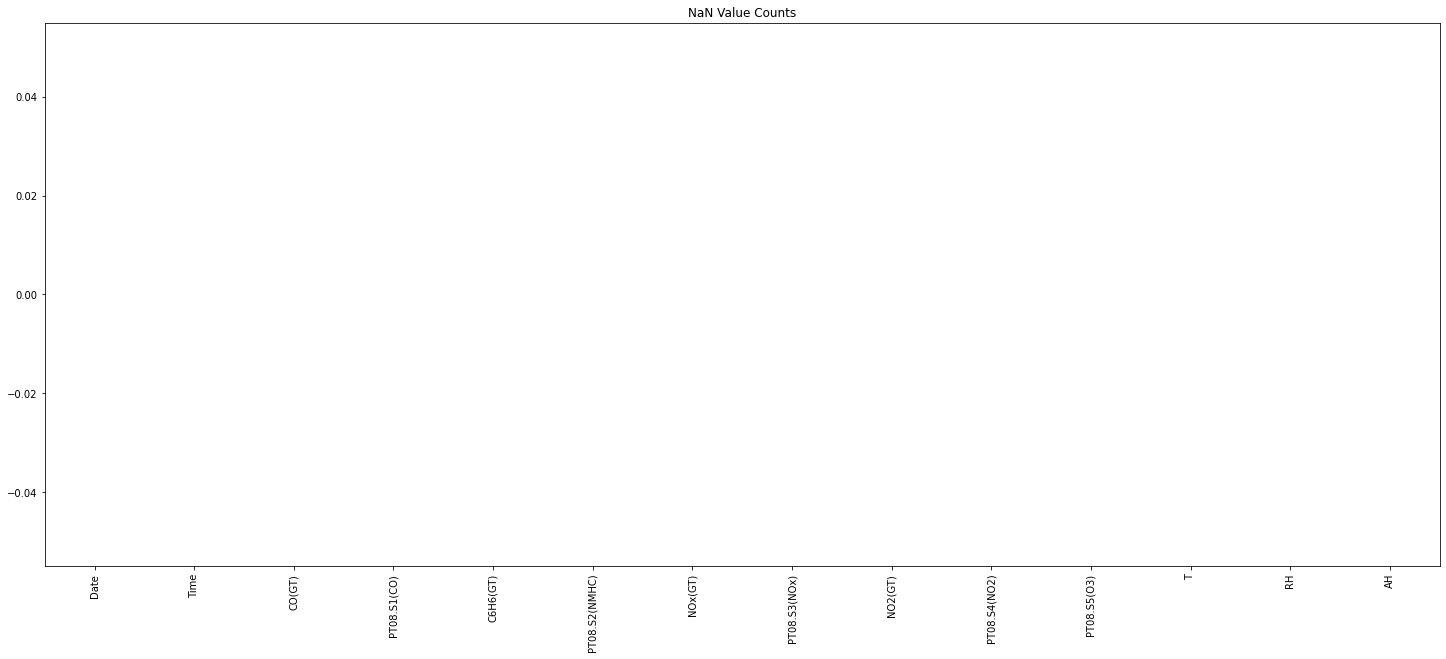

In [ ]:
# Predict missing values in CO(GT) feature according to PT08.S1(CO) feature.
fill_features(dataframe, 'CO(GT)', 2, 4)

# Predict missing values in NOx(GT) feature according to PT08.S3(NOx) feature.
fill_features(dataframe, 'NOx(GT)', 6, 8)

# Predict missing values in NO2(GT) feature according to PT08.S4(NO2) feature.
fill_features(dataframe, 'NO2(GT)', 8, 10)

# Visualize NaN value counts of columns in dataframe after filling all NaN values.
dataframe.isna().sum().plot(kind='bar', title = "NaN Value Counts", figsize = (25,10))
plt.show()

**We predicted the missing values of CO(GT), NOx(GT) and NO2(GT) features with Linear Regression depending on the their sensor responses which are PT08.S1(CO), PT08.S3(NOx) and PT08.S4(NO2) features, so all NaN values filled as shown in barplot.**

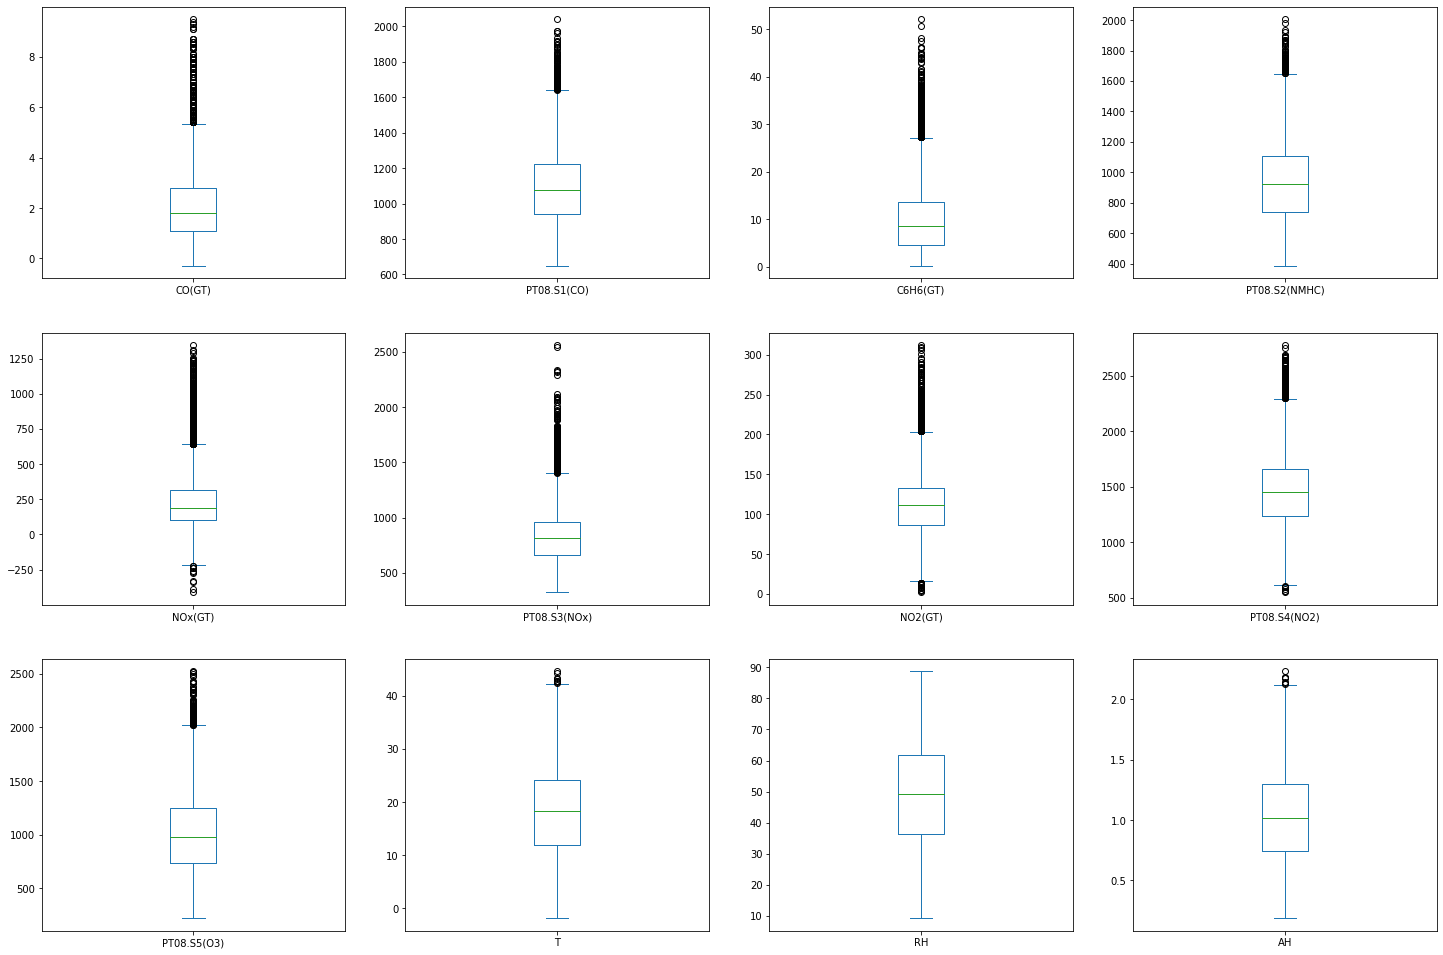

In [ ]:
# Plot boxplots of each column.
dataframe.plot.box(subplots = True, layout = (3,4), figsize=(25, 17))
plt.show()

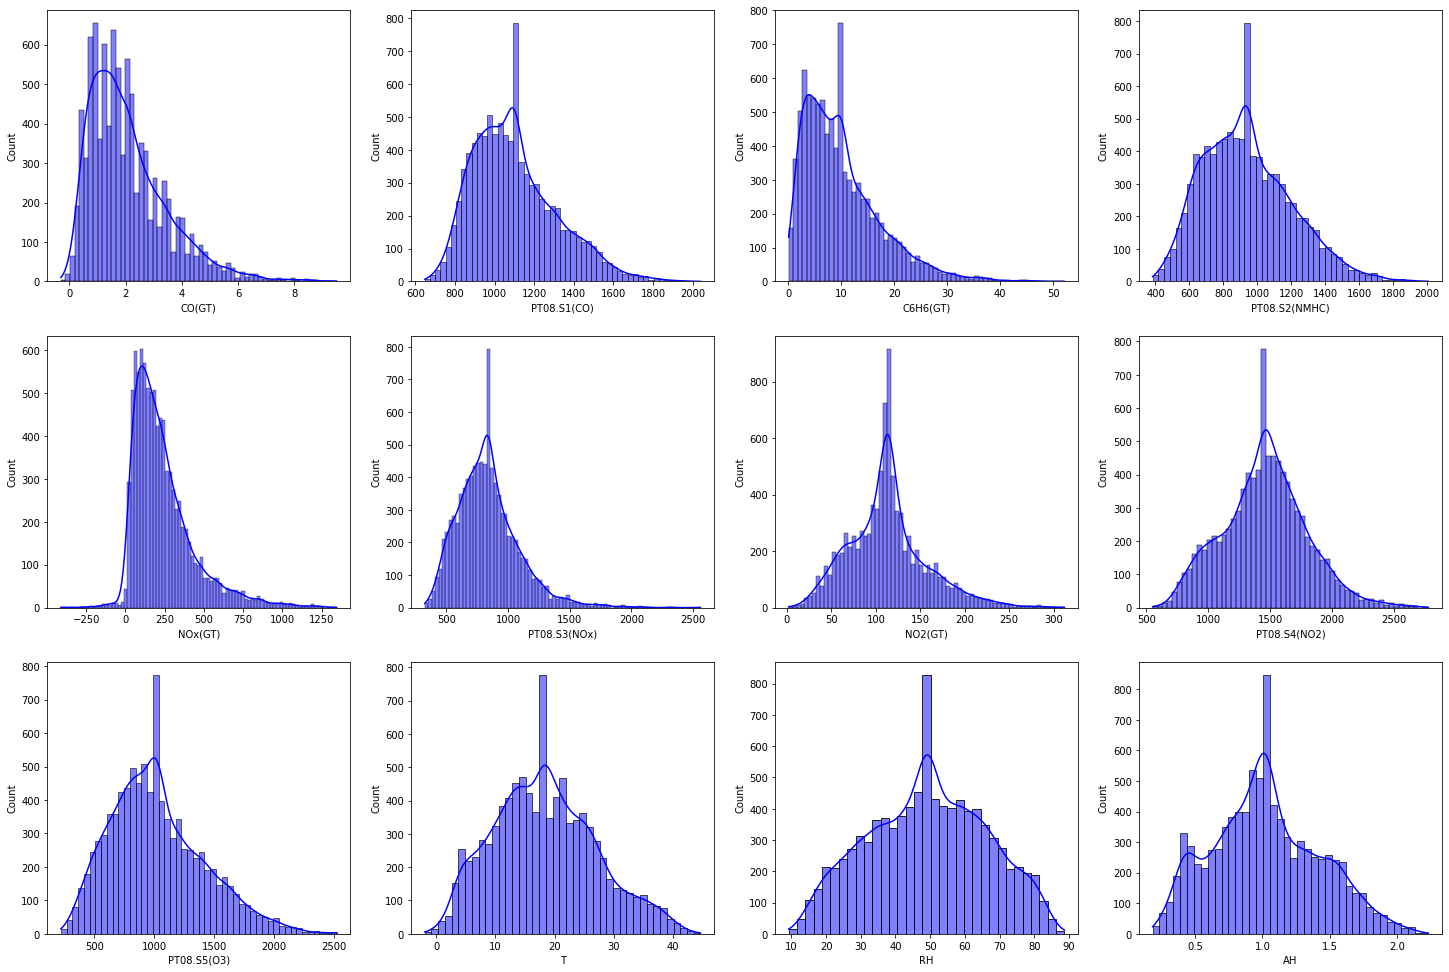

In [ ]:
# Plot histplots of each column.
figure, axes = plt.subplots(3, 4, figsize = (25, 17))

for i, column in enumerate(dataframe.iloc[:, 2:].columns):
  sns.histplot(dataframe[column], color = "blue", kde = True, ax = axes[i//4, i % 4])

plt.show()

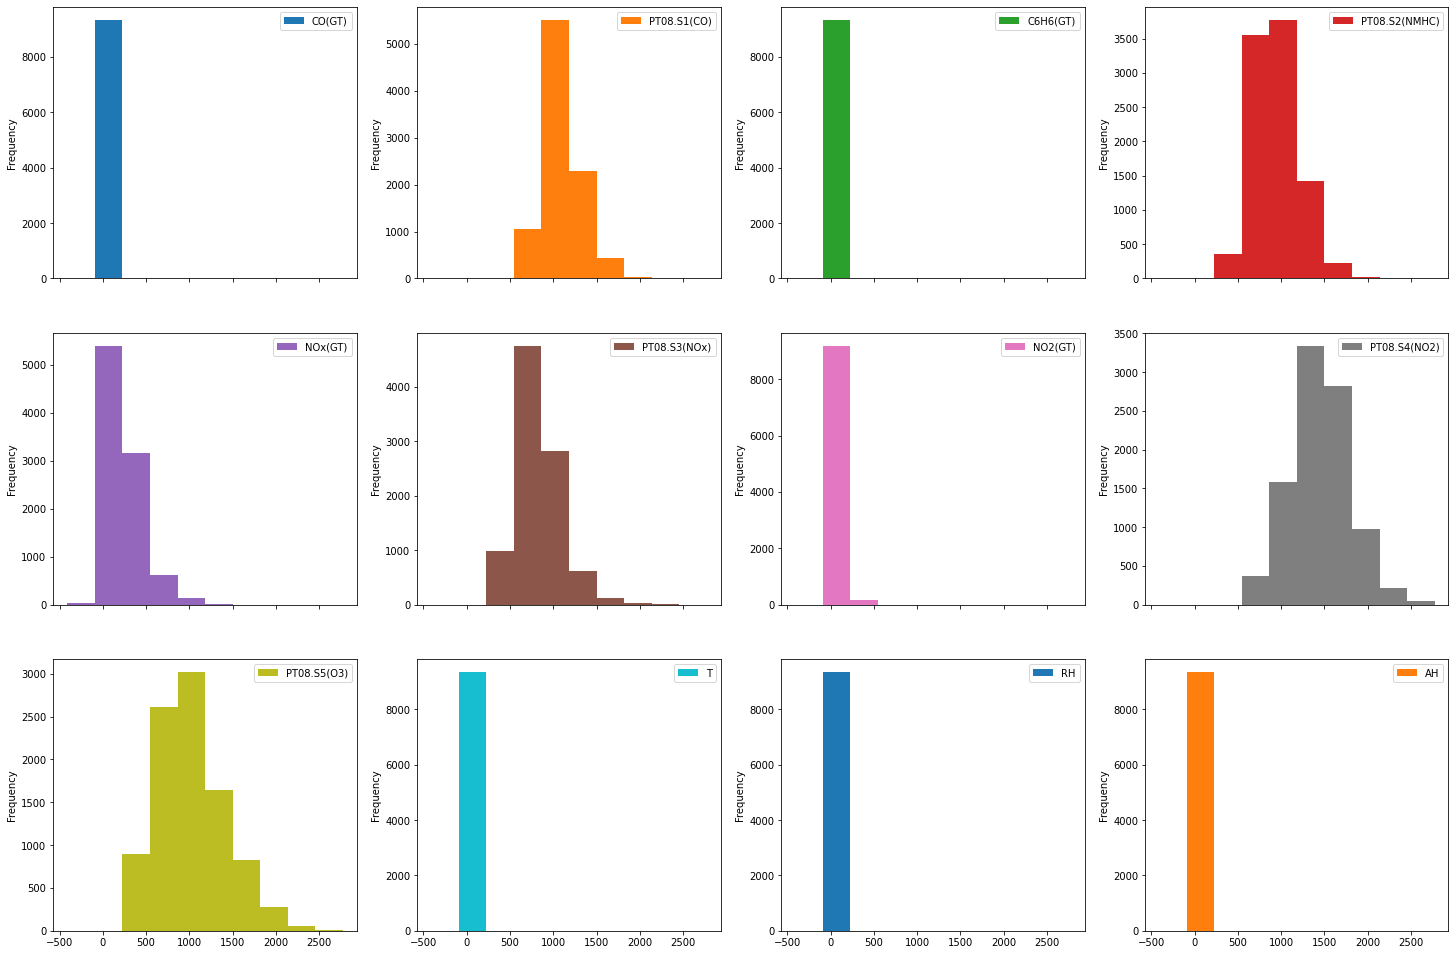

In [ ]:
# Plot histogram of each column.
dataframe.plot.hist(subplots = True, layout = (3,4), figsize=(25, 17))
plt.show()

**Boxplot, histplot and histogram charts of columns show us to there is no specific outlier but we need to apply smoothing.**

In [ ]:
# Apply Z-Score approach to smooth data.
for column in dataframe.iloc[:, 2:].columns:
  up_limit = dataframe[column].mean() + (3 * dataframe[column].std())
  low_limit = dataframe[column].mean() - (3 * dataframe[column].std())
  dataframe = dataframe[(dataframe[column] > low_limit) & (dataframe[column] < up_limit)]

# Check dimensions of dataframe.
print(f"DataFrame Dimensions: {dataframe.shape}\n")

# Display the dataframe.
display(dataframe)

DataFrame Dimensions: (8726, 14)



,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,04/04/2005,10.00.00,3.1,1314.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,04/04/2005,11.00.00,2.4,1163.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,04/04/2005,12.00.00,2.4,1142.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,04/04/2005,13.00.00,2.1,1003.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139


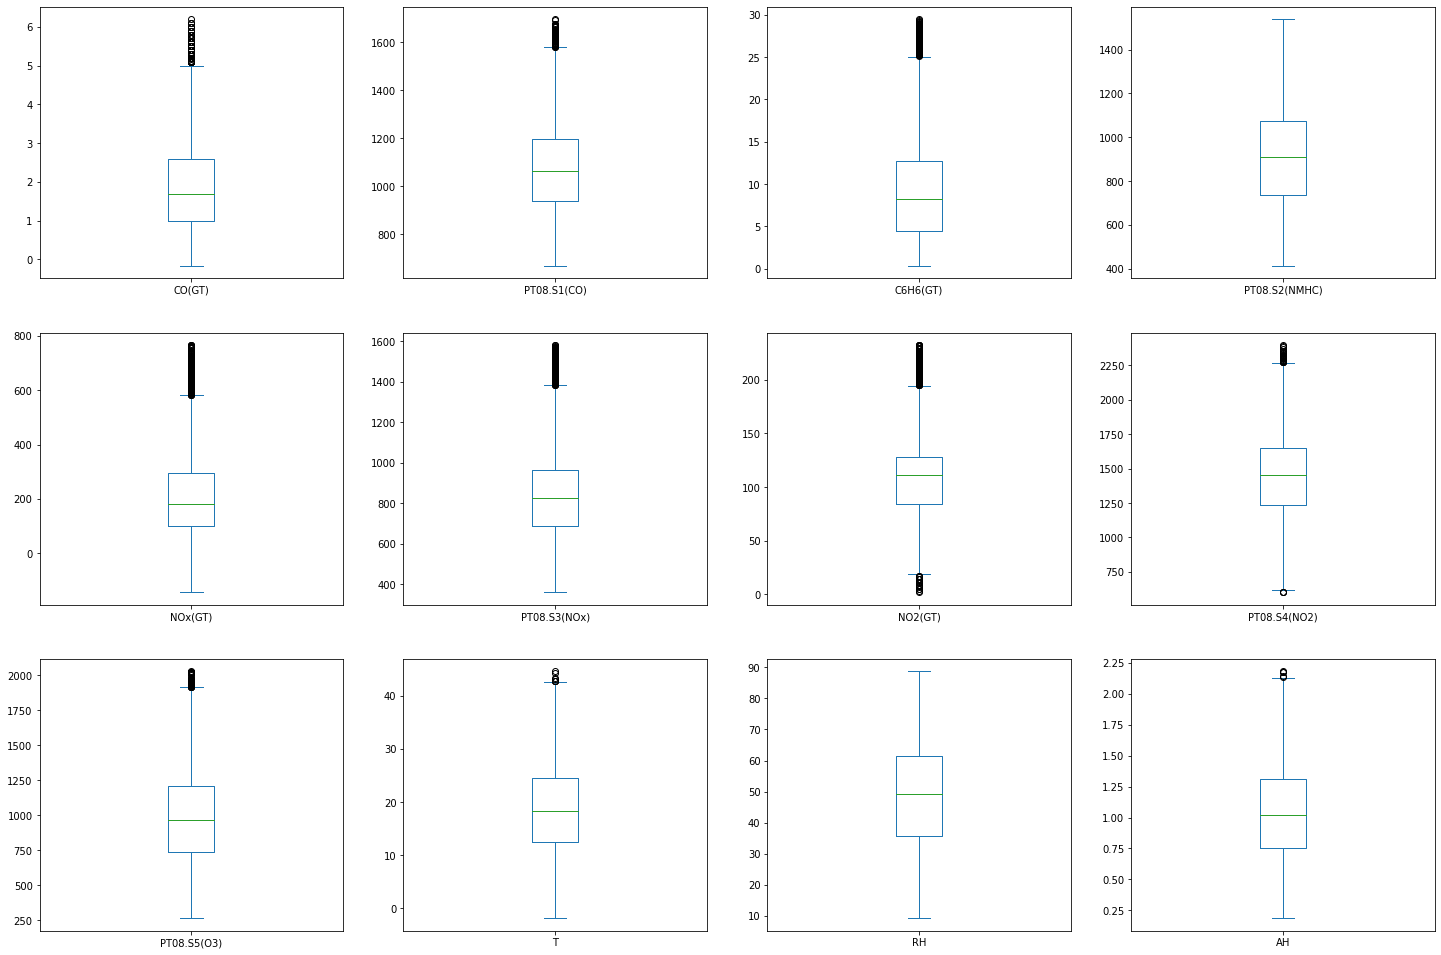

In [ ]:
# Plot boxplots of each column.
dataframe.plot.box(subplots = True, layout = (3,4), figsize=(25, 17))
plt.show()

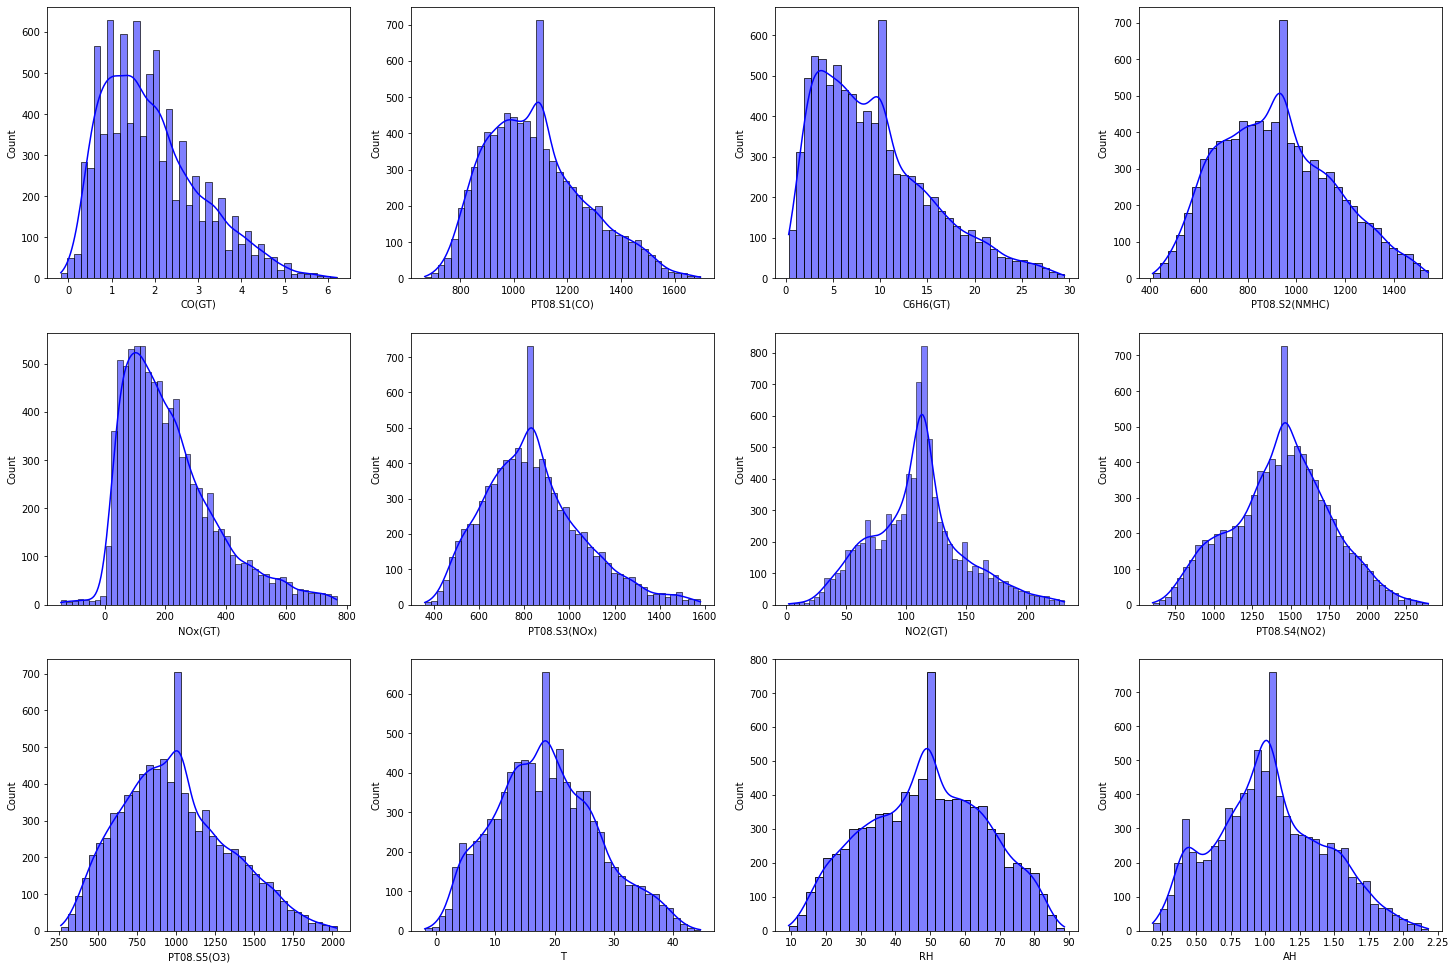

In [ ]:
# Plot histplots of each column.
figure, axes = plt.subplots(3, 4, figsize = (25, 17))

for i, column in enumerate(dataframe.iloc[:, 2:].columns):
  sns.histplot(dataframe[column], color = "blue", kde = True, ax = axes[i//4, i % 4])

plt.show()

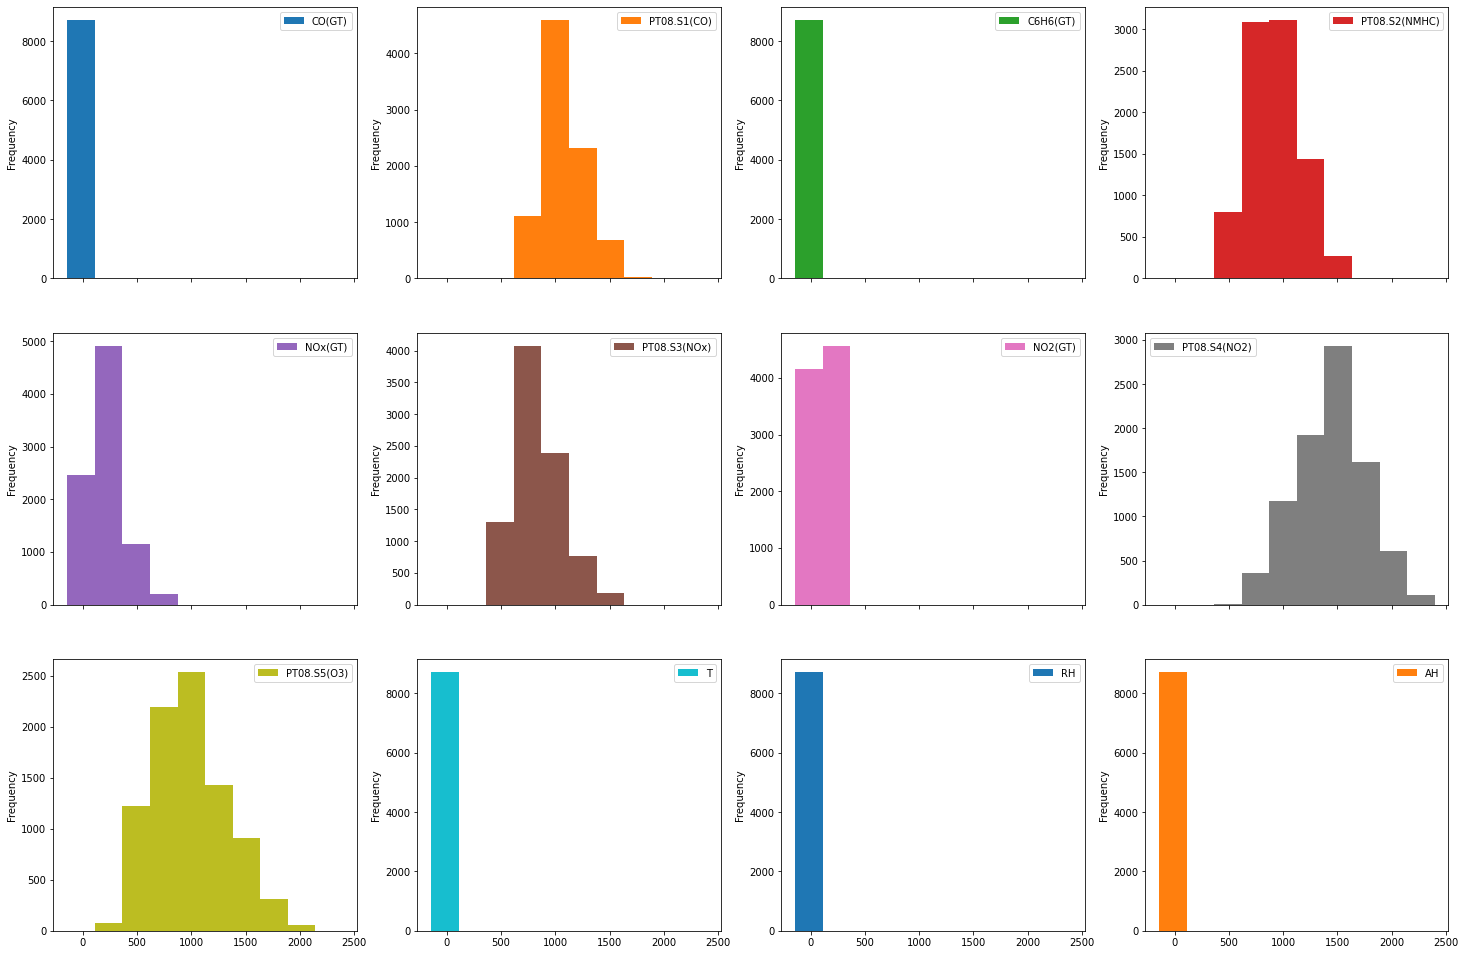

In [ ]:
# Visualize histogram of each column.
dataframe.plot.hist(subplots = True, layout = (3,4), figsize=(25, 17))
plt.show()

**Dataframe dimensions reducted from (9345, 14) to (8726, 14) after applying the Z-Score Trimming. Boxplot, histplot, and histogram charts show us that possible outliers of all features have been adjusted after this operation.**

In [ ]:
# Check categorical data for inconsistencies.
isConsistent = True

# Iterate over values in Date and Time features.
for index in dataframe.index:
  day, month, year = dataframe['Date'].loc[index].split("/")
  hour, minute, second = dataframe['Time'].loc[index].split(".")
  if (2004 <= int(year) <= 2005) and (1 <= int(month) <= 12) and (1 <= int(day) <= 31):
    if (0 <= int(hour) <= 23) and (0 <= int(minute) <= 59) and (0 <= int(second) <= 59):
      continue
    else:
      isConsistent = False
      break
  else:
    isConsistent = False
    break

# Consistency of numerical data had approved while data cleaning operations.
print(f"Data is {'consistent' if isConsistent else 'not consistent'}.")

Data is consistent.


# ***DATA TRANSFORMATION***

In [ ]:
# Check dimensions of dataframe after Data Cleaning Section.
print(f"DataFrame Dimensions: {dataframe.shape}\n")

# Display the dataframe after Data Cleaning Section.
display(dataframe)

DataFrame Dimensions: (8726, 14)



,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,04/04/2005,10.00.00,3.1,1314.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,04/04/2005,11.00.00,2.4,1163.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,04/04/2005,12.00.00,2.4,1142.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,04/04/2005,13.00.00,2.1,1003.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139


**Dataframe dimensions reduced to (8726, 14) from (9471, 17) with getting rid from outliers and empty records in Data Cleaning Section.**

In [ ]:
# We can extract Max Humidity feature from RH and AH features.
dataframe['Max Humidity'] = (dataframe['AH'] / dataframe['RH']) * 100

# Check dimensions of dataframe after Max Humidity feature created.
print(f"DataFrame Dimensions: {dataframe.shape}\n")

# Display the dataframe after Max Humidity feature created.
display(dataframe)

DataFrame Dimensions: (8726, 15)



,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Max Humidity
0,10/03/2004,18.00.00,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,1.549693
1,10/03/2004,19.00.00,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,1.520964
2,10/03/2004,20.00.00,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,1.389259
3,10/03/2004,21.00.00,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,1.311167
4,10/03/2004,22.00.00,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,1.323490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,04/04/2005,10.00.00,3.1,1314.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568,2.582935
9353,04/04/2005,11.00.00,2.4,1163.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119,3.003797
9354,04/04/2005,12.00.00,2.4,1142.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406,3.500546
9355,04/04/2005,13.00.00,2.1,1003.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139,3.806667


**Max Humidity represents the rate of Absolute Humidity to Relative Humidity, so we can extract this feature from existing features.**

In [ ]:
# Create a MinMax Scaler Object.
scaler = preprocessing.MinMaxScaler(feature_range = (0, 1))

# Scale the numeric features into a range.
dataframe.iloc[:, 2:] = scaler.fit_transform(dataframe.iloc[:, 2:])

# Display dataframe after normalize numeric features into (0, 1) range.
display(dataframe)

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Max Humidity
0,10/03/2004,18.00.00,0.435124,0.672816,0.397260,0.562555,0.340752,0.570492,0.482609,0.607461,0.570295,0.333333,0.499371,0.287139,0.115117
1,10/03/2004,19.00.00,0.340978,0.606796,0.311644,0.481810,0.271530,0.667213,0.391304,0.533408,0.402494,0.326882,0.484277,0.270955,0.111826
2,10/03/2004,20.00.00,0.372360,0.713592,0.297945,0.467613,0.302295,0.639344,0.486957,0.531180,0.460317,0.296774,0.563522,0.283331,0.096736
3,10/03/2004,21.00.00,0.372360,0.688350,0.304795,0.475599,0.347344,0.600000,0.521739,0.547327,0.533447,0.277419,0.638994,0.301618,0.087789
4,10/03/2004,22.00.00,0.278214,0.587379,0.212329,0.376220,0.302295,0.692623,0.495652,0.494989,0.480726,0.281720,0.633962,0.302670,0.089200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,04/04/2005,10.00.00,0.513579,0.628155,0.452055,0.611358,0.676968,0.146721,0.817391,0.430401,0.831633,0.511828,0.252830,0.286638,0.233499
9353,04/04/2005,11.00.00,0.403742,0.481553,0.380137,0.545697,0.546217,0.200000,0.769565,0.369154,0.570862,0.563441,0.182390,0.264141,0.281718
9354,04/04/2005,12.00.00,0.403742,0.461165,0.414384,0.577640,0.480292,0.199180,0.752174,0.356347,0.470522,0.619355,0.114465,0.228418,0.338632
9355,04/04/2005,13.00.00,0.356669,0.326214,0.315068,0.487134,0.416565,0.280328,0.669565,0.244989,0.287982,0.649462,0.054088,0.164938,0.373705


**Outliers were dropped in the Data Cleaning Section, so Min-Max Scaling can applied to hold all feature values in a certain range.**

In [ ]:
# Group dataframe records according to Date feature, then apply aggregation to obverse daily data.
day_data = dataframe.groupby('Date').aggregate([min, np.mean, max]).transpose()

# Display aggregated data.
display(day_data)

Date                01/01/2005  01/02/2005  01/03/2005  01/04/2004  \
CO(GT)        min     0.184067    0.152685    0.089921    0.136994   
              mean    0.342219    0.416955    0.213096    0.402377   
              max     0.592034    0.686180    0.466506    0.890163   
PT08.S1(CO)   min     0.240777    0.318447    0.066990    0.234951   
              mean    0.419122    0.498876    0.167330    0.522021   
              max     0.641748    0.764078    0.332039    0.898058   
C6H6(GT)      min     0.092466    0.102740    0.010274    0.071918   
              mean    0.221709    0.327145    0.108562    0.361452   
              max     0.404110    0.633562    0.315068    0.845890   
PT08.S2(NMHC) min     0.210293    0.228926    0.036380    0.180124   
              mean    0.378728    0.470649    0.222804    0.500094   
              max     0.568767    0.755989    0.484472    0.902396   
NOx(GT)       min     0.317678    0.306690    0.201211    0.213297   
              mean    0.470489    0.564737    0.383822    0.322425   
              max     0.841780    0.908804    0.551711    0.534131   
PT08.S3(NOx)  min     0.227049    0.104098    0.320492    0.216393   
              mean    0.354383    0.269456    0.590369    0.434149   
              max     0.521311    0.425410    0.932787    0.718852   
NO2(GT)       min     0.365217    0.434049    0.152174    0.204348   
              mean    0.527979    0.637490    0.468913    0.410638   
              max     0.739130    0.808696    0.682609    0.704348   
PT08.S4(NO2)  min     0.164811    0.163140    0.000557    0.329621   
              mean    0.232788    0.290646    0.069822    0.548008   
              max     0.329065    0.487194    0.185969    0.828508   
PT08.S5(O3)   min     0.349773    0.507937    0.003401    0.281746   
              mean    0.534186    0.662042    0.154195    0.480976   
              max     0.768141    0.965420    0.421769    0.802154   
T             min     0.096774    0.079570    0.027957    0.234409   
              mean    0.186629    0.193322    0.078817    0.385861   
              max     0.316129    0.331183    0.129032    0.548387   
RH            min     0.290566    0.345912    0.244025    0.230189   
              mean    0.522669    0.514796    0.316038    0.518991   
              max     0.679245    0.750943    0.405031    0.803774   
AH            min     0.126660    0.113883    0.009219    0.303923   
              mean    0.155342    0.160281    0.027769    0.347153   
              max     0.202164    0.256526    0.042387    0.421413   
Max Humidity  min     0.023150    0.018680    0.006142    0.069127   
              mean    0.053302    0.057032    0.018583    0.152477   
              max     0.106753    0.113976    0.032227    0.267243   

Date                01/04/2005  01/05/2004  01/06/2004  01/07/2004  \
CO(GT)        min     0.102258    0.121303    0.042848    0.121303   
              mean    0.197004    0.341922    0.290337    0.366475   
              max     0.372360    0.654798    0.607725    0.717562   
PT08.S1(CO)   min     0.146602    0.185437    0.090291    0.175728   
              mean    0.229409    0.417961    0.439510    0.450081   
              max     0.366019    0.735922    0.667961    0.692233   
C6H6(GT)      min     0.017123    0.078767    0.027397    0.085616   
              mean    0.106592    0.286387    0.390411    0.408390   
              max     0.243151    0.510274    0.743151    0.773973   
PT08.S2(NMHC) min     0.054126    0.188110    0.082520    0.204082   
              mean    0.222715    0.445172    0.522665    0.555938   
              max     0.409938    0.659272    0.833185    0.855368   
NOx(GT)       min     0.191322    0.184729    0.024726    0.192421   
              mean    0.336173    0.276902    0.307759    0.310620   
              max     0.502267    0.372615    0.417664    0.445133   
PT08.S3(NOx)  min     0.282787    0.286066    0.243443    0.145902   
         

In [ ]:
# Group dataframe records according to Time feature, then apply aggregation to obverse timely data.
hour_data = dataframe.groupby('Time').aggregate([min, np.mean, max]).transpose()

# Display aggregated data.
display(hour_data)

Time                00.00.00  01.00.00  02.00.00  03.00.00  04.00.00  \
CO(GT)        min   0.042848  0.038571  0.017043  0.000000  0.008970   
              mean  0.294167  0.248030  0.197390  0.165861  0.159510   
              max   0.780326  0.701871  0.890163  0.843090  0.563317   
PT08.S1(CO)   min   0.015534  0.024272  0.023301  0.030097  0.045631   
              mean  0.381187  0.326943  0.277040  0.242468  0.225889   
              max   0.841748  0.838835  0.880583  0.767961  0.823301   
C6H6(GT)      min   0.023973  0.010274  0.003425  0.006849  0.000000   
              mean  0.249653  0.197817  0.148848  0.117765  0.103252   
              max   0.753425  0.623288  0.561644  0.537671  0.568493   
PT08.S2(NMHC) min   0.081633  0.041704  0.014197  0.028394  0.000000   
              mean  0.402496  0.343580  0.279746  0.234984  0.213752   
              max   0.840284  0.748004  0.700089  0.682343  0.704525   
NOx(GT)       min   0.175939  0.169054  0.081077  0.002300  0.014950   
              mean  0.361116  0.330063  0.295578  0.298158  0.254644   
              max   0.943964  0.974729  0.990111  0.598014  0.659388   
PT08.S3(NOx)  min   0.087705  0.132787  0.112295  0.139344  0.121311   
              mean  0.402136  0.447094  0.510221  0.556267  0.577446   
              max   0.945902  1.000000  0.999180  0.988525  0.987705   
NO2(GT)       min   0.000000  0.021739  0.026087  0.117391  0.013043   
              mean  0.439928  0.394719  0.344993  0.456887  0.289573   
              max   0.930435  0.986957  0.930435  0.573913  0.704348   
PT08.S4(NO2)  min   0.020045  0.000000  0.000557  0.027283  0.037305   
              mean  0.438926  0.408469  0.381189  0.364644  0.358477   
              max   0.838530  0.740535  0.656459  0.708241  0.655902   
PT08.S5(O3)   min   0.034014  0.025510  0.003401  0.010204  0.000000   
              mean  0.408988  0.360940  0.314941  0.282382  0.267818   
              max   0.946145  0.994331  0.966553  0.962585  0.898526   
T             min   0.045161  0.040860  0.038710  0.017204  0.010753   
              mean  0.392002  0.383060  0.373811  0.366965  0.360073   
              max   0.681720  0.651613  0.649462  0.660215  0.662366   
RH            min   0.060377  0.066667  0.098113  0.125786  0.167296   
              mean  0.575152  0.589712  0.607783  0.625632  0.642789   
              max   0.942138  0.939623  0.948428  0.973585  0.973585   
AH            min   0.003156  0.000000  0.006413  0.026655  0.034521   
              mean  0.436991  0.435711  0.435001  0.437193  0.438821   
              max   0.979408  0.962573  0.971993  0.963325  0.960118   
Max Humidity  min   0.010026  0.008816  0.008499  0.003402  0.002276   
              mean  0.166269  0.160576  0.154526  0.150249  0.145576   
              max   0.411866  0.373329  0.372293  0.384445  0.386908   

Time                05.00.00  06.00.00  07.00.00  08.00.00  09.00.00  ...  \
CO(GT)        min   0.019734  0.042848  0.042848  0.042848  0.042848  ...   
              mean  0.147026  0.185309  0.320875  0.415847  0.440064  ...   
              max   0.482197  0.576343  0.764635  0.831520  0.952927  ...   
PT08.S1(CO)   min   0.024272  0.035922  0.082524  0.087379  0.106796  ...   
              mean  0.231795  0.287684  0.427684  0.500165  0.504649  ...   
              max   0.800000  0.763107  0.967961  0.947573  0.902913  ...   
C6H6(GT)      min   0.000000  0.010274  0.003425  0.013699  0.030822  ...   
              mean  0.108232  0.163783  0.335734  0.442395  0.443054  ...   
              max   0.503425  0.438356  0.955479  0.986301  0.982877  ...   
PT08.S2(NMHC) min   0.002662  0.032831  0.016859  0.047028  0.095830  ...   
              mean  0.222682  0.297463  0.465411  0.567961  0.574944  ...   
              max   0.653949  0.598048  0.972493  0.992014  0.990240  ...   
NOx(GT)       min   0.000000  0.097752  0.174804  0.174804  0.175939  ...   
              mean  0.263729  0.309286  0

**Grouping the data by Date and Time features provides us to generalizing records. Aggregation on this generalized data, gives a chance to analyze data according to recording date and time. We can use these analysis to arrange weights of other features while developing a model.**

# ***DATA REDUCTION***

In [ ]:
# Drop the categorical columns.
dataframe = dataframe.drop(['Date', 'Time'], axis = 1)

# Check dimensions of dataframe after categorical columns were dropped.
print(f"DataFrame Dimensions: {dataframe.shape}\n")

# Display the dataframe after categorical columns were dropped.
display(dataframe)

DataFrame Dimensions: (8726, 13)



,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Max Humidity
0,0.435124,0.672816,0.397260,0.562555,0.340752,0.570492,0.482609,0.607461,0.570295,0.333333,0.499371,0.287139,0.115117
1,0.340978,0.606796,0.311644,0.481810,0.271530,0.667213,0.391304,0.533408,0.402494,0.326882,0.484277,0.270955,0.111826
2,0.372360,0.713592,0.297945,0.467613,0.302295,0.639344,0.486957,0.531180,0.460317,0.296774,0.563522,0.283331,0.096736
3,0.372360,0.688350,0.304795,0.475599,0.347344,0.600000,0.521739,0.547327,0.533447,0.277419,0.638994,0.301618,0.087789
4,0.278214,0.587379,0.212329,0.376220,0.302295,0.692623,0.495652,0.494989,0.480726,0.281720,0.633962,0.302670,0.089200
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,0.513579,0.628155,0.452055,0.611358,0.676968,0.146721,0.817391,0.430401,0.831633,0.511828,0.252830,0.286638,0.233499
9353,0.403742,0.481553,0.380137,0.545697,0.546217,0.200000,0.769565,0.369154,0.570862,0.563441,0.182390,0.264141,0.281718
9354,0.403742,0.461165,0.414384,0.577640,0.480292,0.199180,0.752174,0.356347,0.470522,0.619355,0.114465,0.228418,0.338632
9355,0.356669,0.326214,0.315068,0.487134,0.416565,0.280328,0.669565,0.244989,0.287982,0.649462,0.054088,0.164938,0.373705


**Date and Time features were used in Data Transformation Section to analyze data but these categorical features probably won't use for developing a model, so dropping of these features is a good choice for data reduction.**

In [ ]:
# Drop the RH and AH.
dataframe = dataframe.drop(['RH', 'AH'], axis = 1)

# Check dimensions of dataframe after RH and AH features were dropped.
print(f"DataFrame Dimensions: {dataframe.shape}\n")

# Display the dataframe after RH and AH features were dropped.
display(dataframe)

DataFrame Dimensions: (8726, 11)



,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,Max Humidity
0,0.435124,0.672816,0.397260,0.562555,0.340752,0.570492,0.482609,0.607461,0.570295,0.333333,0.115117
1,0.340978,0.606796,0.311644,0.481810,0.271530,0.667213,0.391304,0.533408,0.402494,0.326882,0.111826
2,0.372360,0.713592,0.297945,0.467613,0.302295,0.639344,0.486957,0.531180,0.460317,0.296774,0.096736
3,0.372360,0.688350,0.304795,0.475599,0.347344,0.600000,0.521739,0.547327,0.533447,0.277419,0.087789
4,0.278214,0.587379,0.212329,0.376220,0.302295,0.692623,0.495652,0.494989,0.480726,0.281720,0.089200
...,...,...,...,...,...,...,...,...,...,...,...
9352,0.513579,0.628155,0.452055,0.611358,0.676968,0.146721,0.817391,0.430401,0.831633,0.511828,0.233499
9353,0.403742,0.481553,0.380137,0.545697,0.546217,0.200000,0.769565,0.369154,0.570862,0.563441,0.281718
9354,0.403742,0.461165,0.414384,0.577640,0.480292,0.199180,0.752174,0.356347,0.470522,0.619355,0.338632
9355,0.356669,0.326214,0.315068,0.487134,0.416565,0.280328,0.669565,0.244989,0.287982,0.649462,0.373705


**Dropping the AH and RH is a good choice for data reduction because Max Humidity can represent the information of these features alone.**

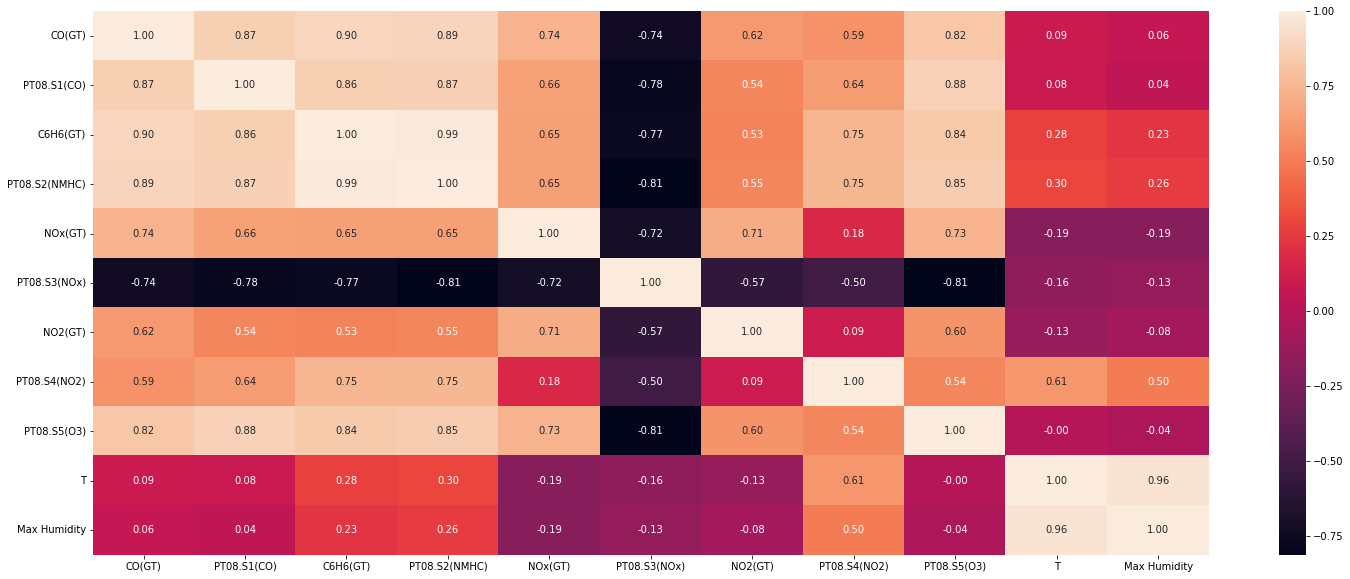

In [ ]:
# Plot Correlation Heatmap.
plt.figure(figsize = (25, 10))
correlation_heatmap = sns.heatmap(dataframe.corr(), annot = True, fmt = ".2f")
plt.show()

**Features other than PT08.S3(NOx), Max Humidity and T have a big correlation among themselves according to Heatmap. These three feature can called as distinctive, and preciousity of distinctive features are higher than correlated features.**

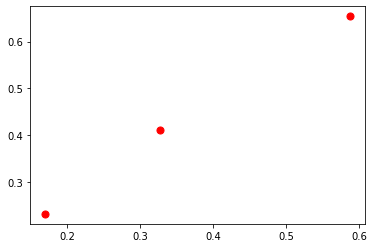

In [ ]:
# Cluster the records.
k_means = KMeans(n_clusters = 3).fit(dataframe)

# Find centers of clusters.
centroids = k_means.cluster_centers_

# Display the center points of clusters.
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

**Center points of cluster shows the where the records are clustering. We can reduce the attribute values according to these clusters.**

In [ ]:
# Create a feature to specify cluster of each record.
dataframe['Cluster'] = k_means.labels_

# Check dimensions of dataframe after Cluster feature added.
print(f"DataFrame Dimensions: {dataframe.shape}\n")

# Display the dataframe after Cluster feature added.
display(dataframe)

DataFrame Dimensions: (8726, 12)



,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,Max Humidity,Cluster
0,0.435124,0.672816,0.397260,0.562555,0.340752,0.570492,0.482609,0.607461,0.570295,0.333333,0.115117,0
1,0.340978,0.606796,0.311644,0.481810,0.271530,0.667213,0.391304,0.533408,0.402494,0.326882,0.111826,0
2,0.372360,0.713592,0.297945,0.467613,0.302295,0.639344,0.486957,0.531180,0.460317,0.296774,0.096736,0
3,0.372360,0.688350,0.304795,0.475599,0.347344,0.600000,0.521739,0.547327,0.533447,0.277419,0.087789,0
4,0.278214,0.587379,0.212329,0.376220,0.302295,0.692623,0.495652,0.494989,0.480726,0.281720,0.089200,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9352,0.513579,0.628155,0.452055,0.611358,0.676968,0.146721,0.817391,0.430401,0.831633,0.511828,0.233499,1
9353,0.403742,0.481553,0.380137,0.545697,0.546217,0.200000,0.769565,0.369154,0.570862,0.563441,0.281718,0
9354,0.403742,0.461165,0.414384,0.577640,0.480292,0.199180,0.752174,0.356347,0.470522,0.619355,0.338632,0
9355,0.356669,0.326214,0.315068,0.487134,0.416565,0.280328,0.669565,0.244989,0.287982,0.649462,0.373705,0


**Principal Component Analysis needs a label to make analyze, so Cluster feature was added to dataframe.** 

In [ ]:
# Create a PCA.
principal_components = PCA(n_components = 3)

# Find principal components of dataframe.
components = principal_components.fit_transform(dataframe.iloc[:, :11])

# Convert components array to dataframe.
components_dataframe = pd.DataFrame(components, columns = ['Component_1', 'Component_2', 'Component_3'])

# Display principal components.
display(components_dataframe)

,Component_1,Component_2,Component_3
0,0.224926,-0.081312,-0.269685
1,-0.048164,-0.044536,-0.282788
2,0.042889,-0.125902,-0.250482
3,0.100808,-0.168369,-0.227569
4,-0.124134,-0.154223,-0.199500
...,...,...,...
8721,0.647501,-0.202315,0.253983
8722,0.337924,-0.070093,0.315568
8723,0.305681,0.034891,0.336734
8724,0.014030,0.098255,0.390363


**Principal Component Analysis is basically a statistical procedure to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables, and reduce the dimensions of dataframe.**

In [ ]:
# Create a concatenated dataframe with principal components and cluster feature.
pca_df = pd.concat([components_dataframe, dataframe.iloc[:, 11].reset_index().iloc[:, 1]], axis = 1)

# Check dimensions of PCA dataframe.
print(f"DataFrame Dimensions: {pca_df.shape}\n")

# Display the dataframe after Cluster feature added.
display(pca_df)

DataFrame Dimensions: (8726, 4)



,Component_1,Component_2,Component_3,Cluster
0,0.224926,-0.081312,-0.269685,0
1,-0.048164,-0.044536,-0.282788,0
2,0.042889,-0.125902,-0.250482,0
3,0.100808,-0.168369,-0.227569,0
4,-0.124134,-0.154223,-0.199500,0
...,...,...,...,...
8721,0.647501,-0.202315,0.253983,1
8722,0.337924,-0.070093,0.315568,0
8723,0.305681,0.034891,0.336734,0
8724,0.014030,0.098255,0.390363,0


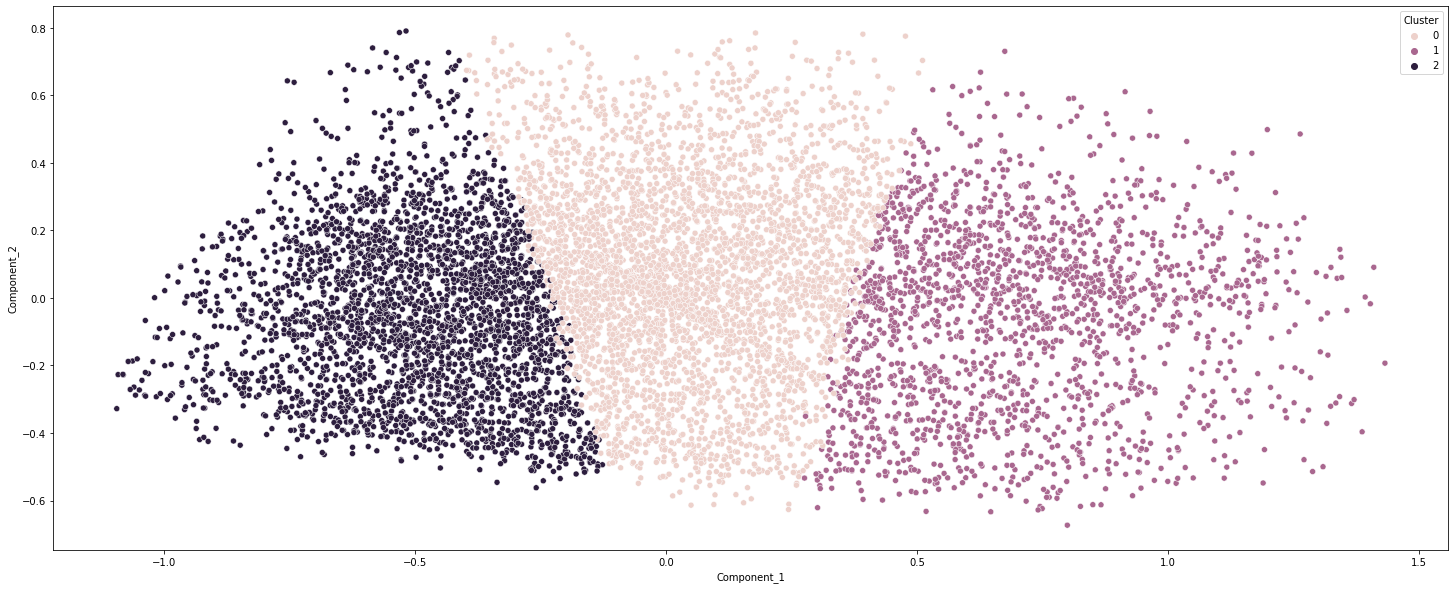

In [ ]:
# Visualize the principle components 1 and 2.
plt.figure(figsize = (25,10))
sns.scatterplot(data = pca_df, x = "Component_1", y = "Component_2", hue = "Cluster")
plt.show()

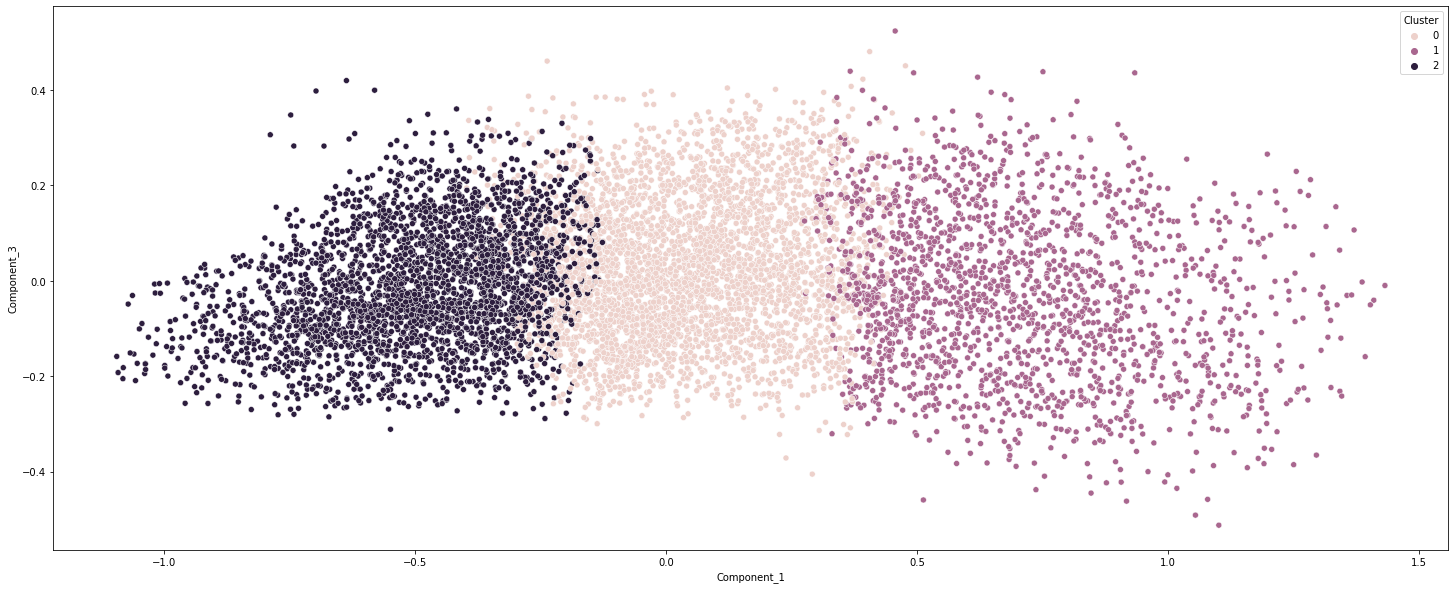

In [ ]:
# Visualize the principle components 1 and 3.
plt.figure(figsize = (25,10))
sns.scatterplot(data = pca_df, x = "Component_1", y = "Component_3", hue = "Cluster")
plt.show()

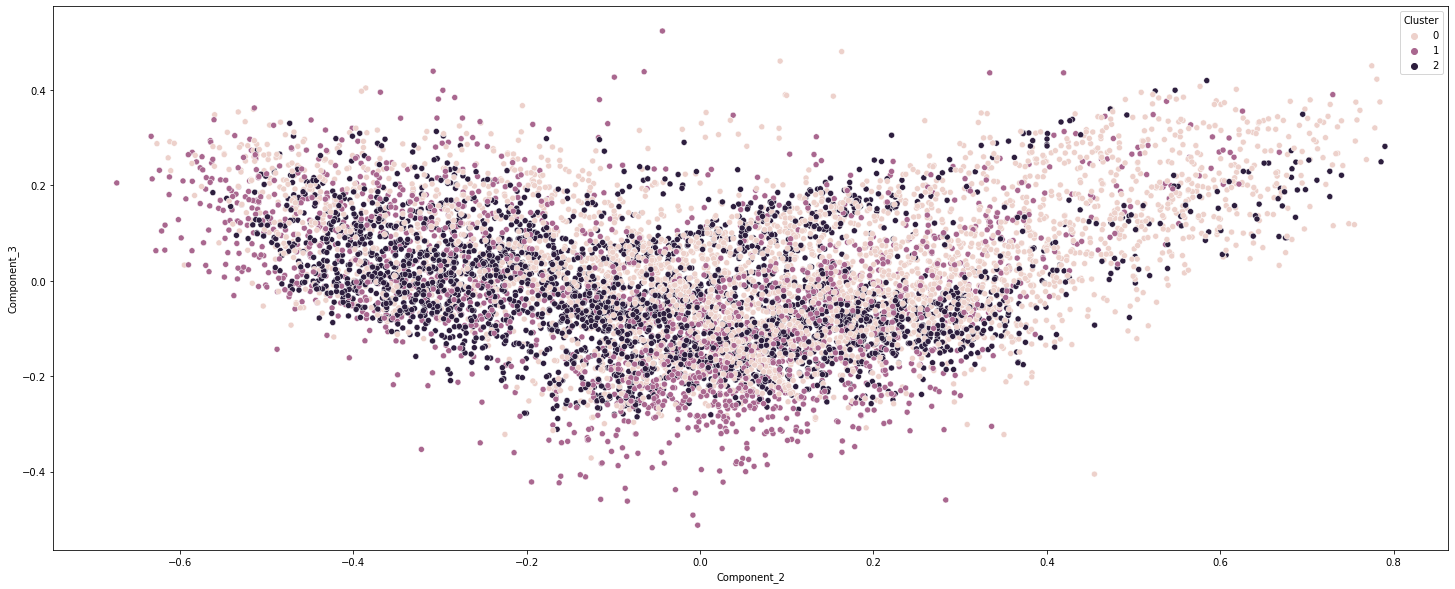

In [ ]:
# Visualize the principle components 2 and 3.
plt.figure(figsize = (25,10))
sns.scatterplot(data = pca_df, x = "Component_2", y = "Component_3", hue = "Cluster")
plt.show()

**According to PCA Score Graphs,**
* **Component 1:**
  * **Class records influence different because spread records into different wide ranges.**
  * **Coherent with other Components because they are not affect each other too much.**
  * **Important feature because of all these reasons.** 
* **Component 2:**
  * **Class records influence similar because spread records into similar range.**
  * **Coherention with Component 1 is not deciadable because spread records into a narrow range with too much outlier.**
  * **Coherantion with Component 3 is not good too much because spread records to wide ranges with too much outlier.**
  * **Important feature when use alone or with Component 1, but not coherent with Component 3 so we shouldn't choose together.**
* **Component 3:**
  * **Class records influence similar because spread records into similar narrow ranges.**
  * **Coherent with Component 1 but has outliers, so affect on records can't decidable sometimes.**
  * **Coherention with Component 2 is not decidable because squeeze records into a with range but has too much outlier.**
  * **Important feature when use with Component 1, but not coherent with Component 2 so we shouldn't choose together.**

# ***REPORT***

## ***Overview of Problem***

#### ***Real-World data is often incomplete, inconsistent and contain many errors, so we need to preprocess raw data. Preprocessing of data is an important step to transforming raw data into an understandable format. In this problem, we will preprocess the data to observe Air Quality of an Italian City in 2004 - 2005.***

<br>

## ***Data Cleaning Part Summarization*** 

##### ***1. Drop rows with NaN in all columns and columns with NaN in all rows.***

##### ***2. Convert -200 values to NaN values because -200 mentioned as missing value at the Dataset Part.***

##### ***3. Visualize the NaN value count of each column with bar plots.***

* ***NMHC(GT) feature has too much NaN value in bar plot so we would drop this feature because we can't dealt with all these NaN's.***

##### ***4. CO(GT), C6H6(GT), T, RH and AH features are mentioned as numeric value in Dataset Part so convert them to numeric from object type.***

##### ***5. Visualize the boxplot and histplot of each column to detect outliers before filling NaN values.***

* ***Features except CO(GT), C6H6(GT), PT08.S2(NMHC), NOx(GT), PT08.S3(NOx) and NO2(GT) are spread into a certain range so we don't need to consider them as outlier.***
* ***CO(GT), C6H6(GT), PT08.S2(NMHC), NOx(GT), PT08.S3(NOx) and NO2(GT) features have too few outliers, these outliers can affect the mean of feature so we have to delete them.***

##### ***6. Features except CO(GT), NOx(GT) and NO2(GT) has too few NaN value so we can fill them with mean value.***

##### ***7. CO(GT), NOx(GT) and NO2(GT) has too much NaN value than other features so we have to fill them with a learning function. Linear Regression is a good choice because all of these features has a certain relationship with another feature.***
* ***CO(GT) and PT08.S1(CO)***
* ***NOx(GT) and PT08.S3(NOx)***
* ***NO2(GT) and PT08.S4(NO2)***
##### ***pairs have certain relationship according to Dataset Part, so usage of these features for prediction in Linear Regression is a good choice.***

##### ***8. Visualize boxplot, histplot and histogram of columns to check outliers after filling missing data.***
* ***All features are spread over a certain range, so there is nothing that can be considered as outliers but we have to smooth data with Z-Score because most of the features has normal distribution.***

##### ***9. Smoothing data with Z-Score Trimming provides us to get rid of from possible outliers of dataframe, so dataframe is completely  smooth as shown in boxplot, histplot and histogram graphs after Z-Score Trimming.***

##### ***10. Consistency check of categorical features is the last step of Data Cleaning Part. Numeric features consistency approved while previous operations such as data type conversion and graph plotting.***

<br>

## ***Data Transformation Part Summarization***

##### ***1. Construct the Max Humidity attribute from Relative Humidity and Absolute Humidity attributes. Max Humidity can represents alone the information that represented by Relative and Absolute Humidity.***

##### ***2. Scale all numeric data into (0, 1) range. Min-Max Scaler used because the dataframe has no outlier so Min-Max Scaler can't affect by noises. Scaling allows us to explore all features within the same range.***

##### ***3. Group dataframe by Date and Time features, this step provides to generalize data according to specified features.***

##### ***4. Aggregate the grouped dataframes with calculating minimum, mean and maximum values of groups. Aggregation makes easier the analyzing data because we can observe the statistical outputs of each feature. This observation provides a chance to determine feature weight while developing models.***

<br>

## ***Data Reduction Part Summarization***

##### ***1. Date and Time columns are categorical, RH and AH columns can represented by Max Humidity so dropping of these columns is a good choice for data reduction.***

##### ***2. Observation of Correlation Heatmap is necessary for detect relationships of features to determine distinct features.***

##### ***3. Dataframe needs a label before PCA, so we cluster the records to create label for each records.***

##### ***4. Create 3 Principal Component according to Cluster Numbers from dataframe.***

##### ***5. Plotting Score Graphs of these Principal Components shows us to 2 Component sufficient for model development.***

<br>

## ***Results***

##### ***1. Raw Data has 7 unnecessary feature for model development.***

##### ***2. One extra feature can extract from this raw data.***

##### ***3. %7 record of the raw data is an outlier, that is a good rate.***

##### ***4. Features other than 3 feature correlated with each other, so we can predict NaN values according to another feature.***

##### ***5. Correlation rates between features is too much, so most of the features affect the result in same way and don't create a differentiation.***

##### ***6. Dataset dimension can reduce into 2 principal component to use in model development.***